In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.image as mpimg
matplotlib.style.use('ggplot')
%matplotlib inline

# displays all floats within two decimal points
pd.options.display.float_format = '{:20,.2f}'.format

# imports available and sold homes as dataframes

avail = pd.read_csv("dallas_available_real_estate.csv")
sold = pd.read_csv("dallas_real_estate_sold_filtered.csv")

d_active = pd.read_csv("dallas_available_real_estate.csv")
d_sold = pd.read_csv("dallas_real_estate_sold_filtered.csv")
d_map = pd.read_csv("clean_data_redfin_30MAR2019_sfinc_final.csv")

d = pd.read_csv("dallas_available_real_estate.csv")

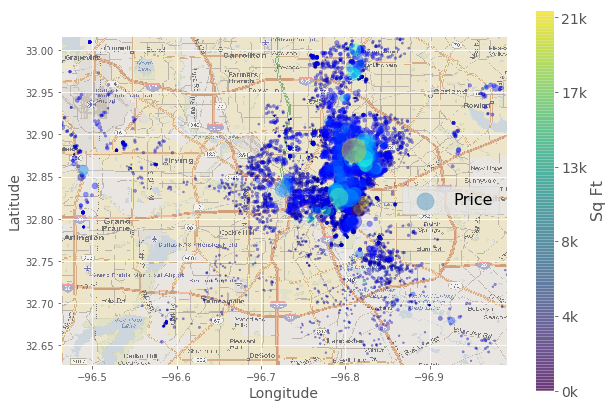

In [2]:
# report page 2

long = d_map["LONGITUDE"]
lat = d_map["LATITUDE"]

dallas_img=mpimg.imread('dallas.gif')
ax = d_map.plot(kind="scatter", x="LONGITUDE", y="LATITUDE", figsize=(10,7),
                       s=d_map['PRICE']/50000, label="Price",
                       c="SQUARE FEET", cmap=plt.get_cmap("jet"),
                       colorbar=False, alpha=0.4,
                      )
plt.imshow(dallas_img, extent=[-96.4627899, -96.991975, 32.6269526, 33.017069899999996], alpha=0.5)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

sq_ft = d_map["SQUARE FEET"]
tick_values = np.linspace(sq_ft.min(), sq_ft.max(), 10)
cbar = plt.colorbar()
cbar.ax.set_yticklabels(["%dk"%(round(v)/1000) for v in tick_values], fontsize=14)
cbar.set_label('Sq Ft', fontsize=16)

plt.legend(fontsize=16)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020ADCAEB518>,
      dtype=object)

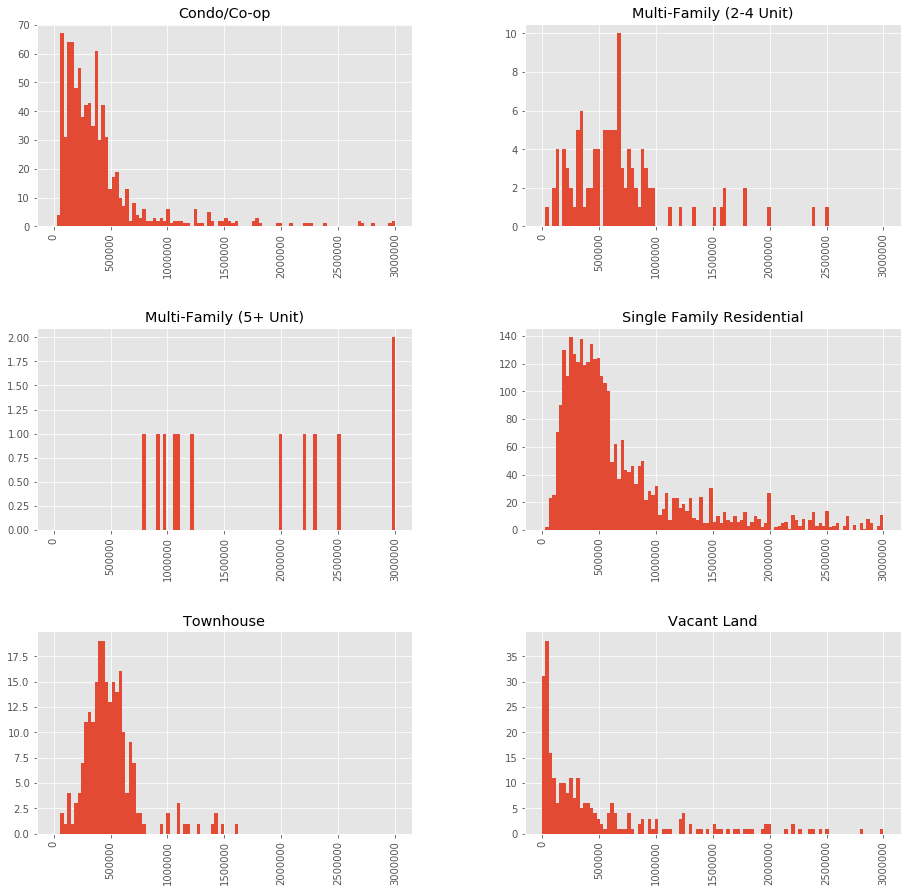

In [3]:
# report page 3
d_active[~d_active.property_type.str.contains("Ranch")].\
hist(column = "price", bins = 100, by = "property_type", figsize=(15,15), range = (0, 3000000))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020AE1AD5BE0>,
      dtype=object)

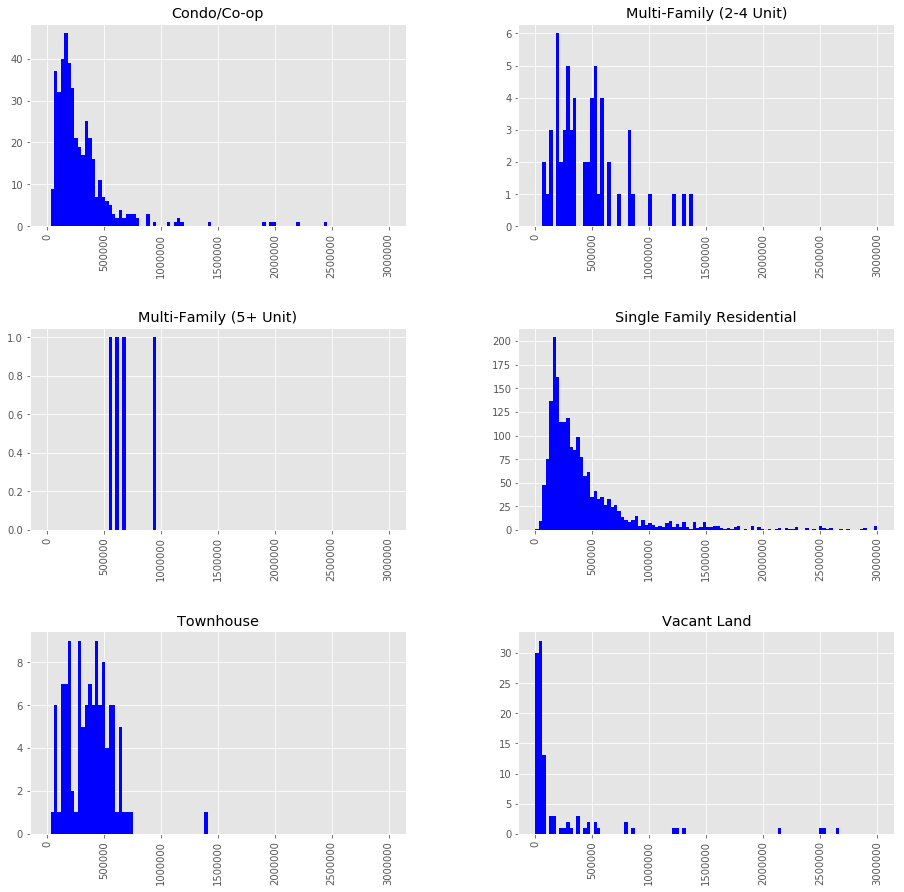

In [4]:
# report page 4
d_sold.hist(column = "price",\
figsize=(15,15), bins = 100, by = "property_type", color = "blue", range = (0, 3000000))

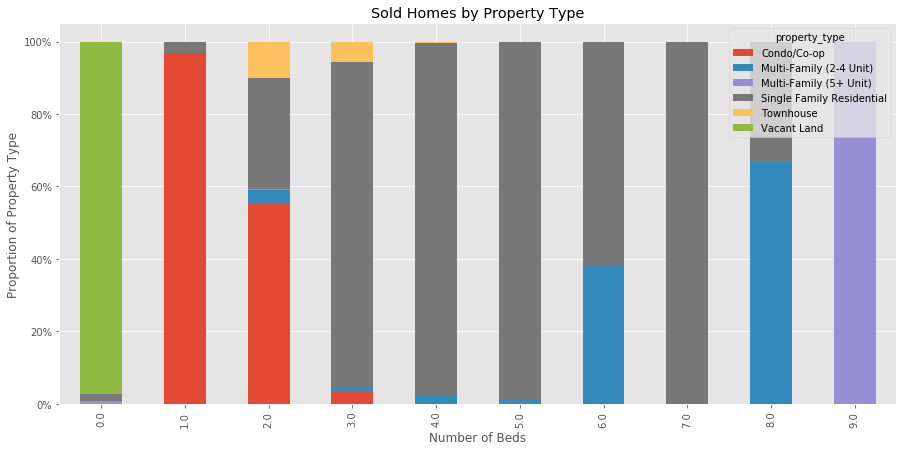

In [5]:
# report page 5
fig, ax = plt.subplots(figsize=(15,7))
sold.groupby(['beds','property_type']).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).unstack().plot(kind='bar',stacked=True, ax=ax)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.xlabel('Number of Beds')
plt.ylabel('Proportion of Property Type')
plt.title('Sold Homes by Property Type')
plt.show()

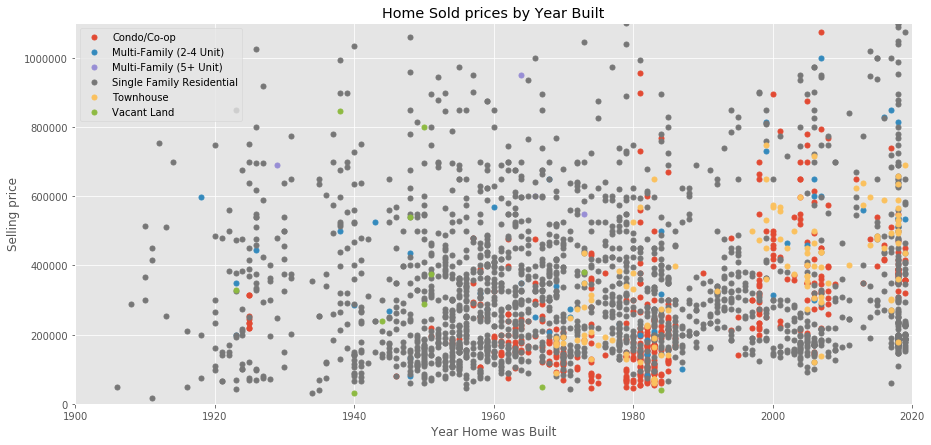

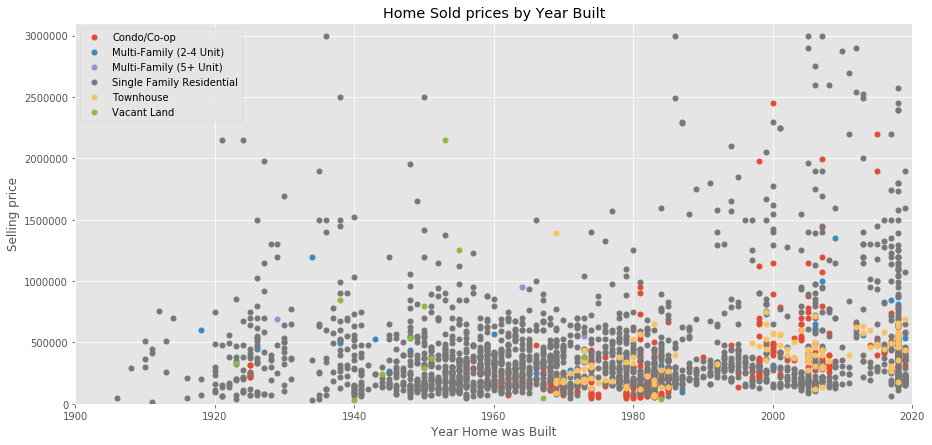

In [6]:
# both graphs on report page 6
# homes from 0 to 1.1 million dollars
fig, ax = plt.subplots(figsize=(15,7))
groups = sold.groupby('property_type')
for name, group in groups:
    ax.plot(group.year_built, group.price, marker='o', linestyle='', ms=5, label=name)
ax.set_xlim(1900,2020)
ax.set_ylim(0,1100000)
ax.legend(numpoints=1)
plt.title('Home Sold prices by Year Built')
plt.xlabel('Year Home was Built')
plt.ylabel('Selling price')
plt.show()

# homes from 0 to 3.1 million dollars
fig, ax = plt.subplots(figsize=(15,7))
groups = sold.groupby('property_type')
for name, group in groups:
    ax.plot(group.year_built, group.price, marker='o', linestyle='', ms=5, label=name)
ax.set_xlim(1900,2020)
ax.set_ylim(0,3100000)
ax.legend(numpoints=1)
plt.title('Home Sold prices by Year Built')
plt.xlabel('Year Home was Built')
plt.ylabel('Selling price')
plt.show()

Text(0.5, 0, 'Days since home was sold')

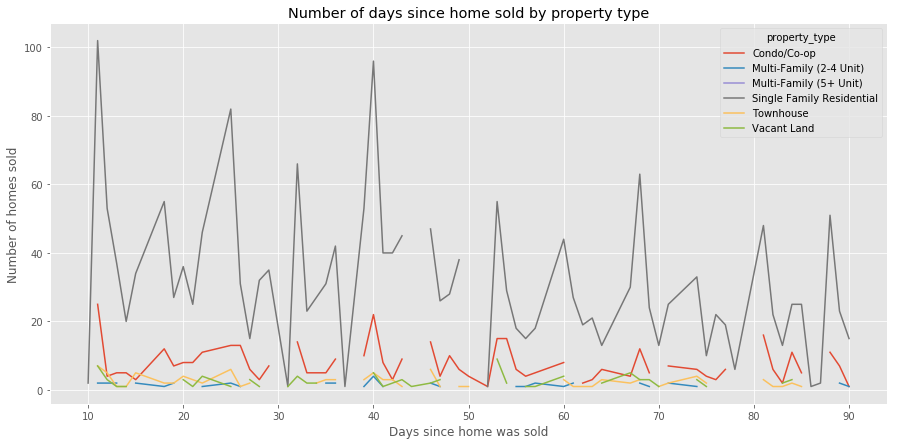

In [7]:
# report page 7
fig, ax = plt.subplots(figsize=(15,7))
sold.groupby(['days_on_market', 'property_type',]).count()['price'].unstack().plot(ax=ax)
plt.title("Number of days since home sold by property type")
plt.ylabel("Number of homes sold")
plt.xlabel("Days since home was sold")

Text(0, 0.5, 'Actual price per square foot')

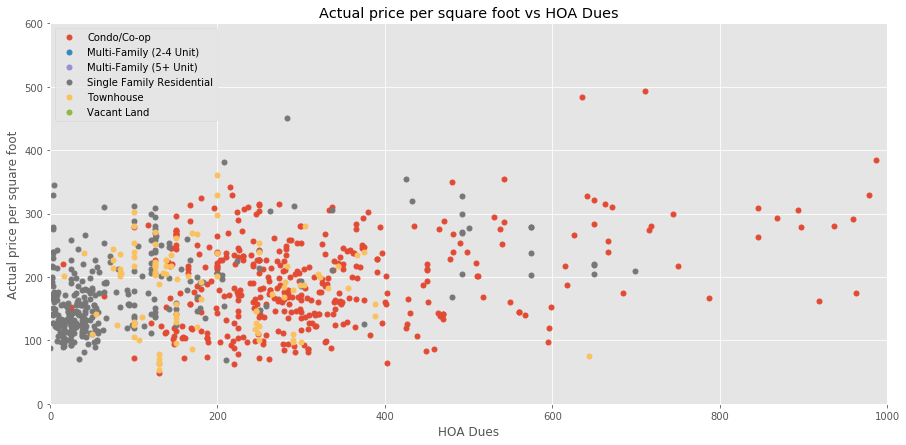

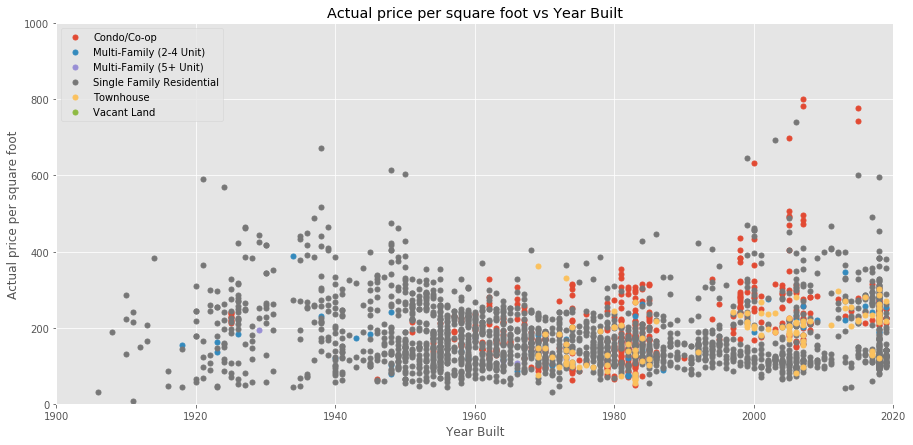

In [8]:
# both graphs on report page 8

# actual price per square foot vs HOA
fig, ax = plt.subplots(figsize=(15,7))
groups = d_sold.groupby('property_type')
for name, group in groups:
    ax.plot(group.hoa_per_month, group.price_per_square_feet, marker='o', linestyle='', ms=5, label=name)
ax.set_xlim(0, 1000)
ax.set_ylim(0, 600)
ax.legend(numpoints=1)
plt.title('Actual price per square foot vs HOA Dues')
plt.xlabel('HOA Dues')
plt.ylabel('Actual price per square foot')

# actual price per square foot vs year built
fig, ax = plt.subplots(figsize=(15,7))
groups = d_sold.groupby('property_type')
for name, group in groups:
    ax.plot(group.year_built, group.price_per_square_feet, marker='o', linestyle='', ms=5, label=name)
ax.set_xlim(1900, 2020)
ax.set_ylim(0, 1000)
ax.legend(numpoints=1)
plt.title('Actual price per square foot vs Year Built')
plt.xlabel('Year Built')
plt.ylabel('Actual price per square foot')

Text(0, 0.5, 'Listed Price')

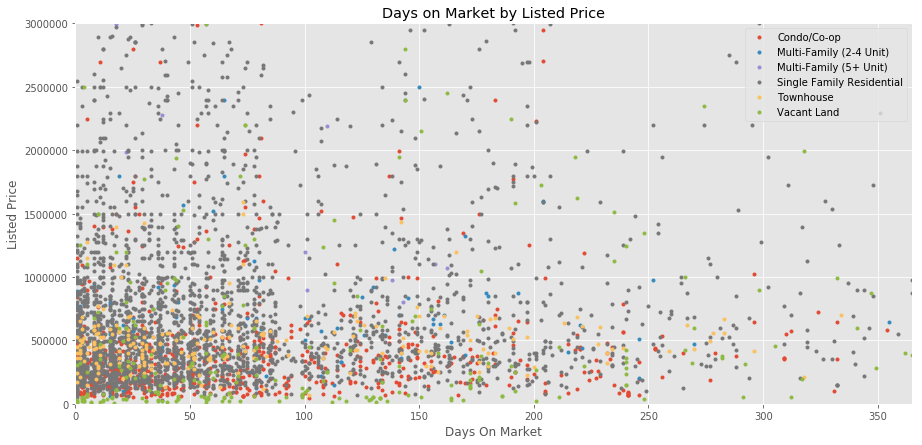

In [9]:
# report page 9
test3 = avail[~avail.property_type.str.contains("Ranch")]
fig, ax = plt.subplots(figsize=(15,7))
groups = test3.groupby('property_type')
for name, group in groups:
    ax.plot(group.days_on_market, group.price, marker='o', linestyle='', ms=3, label=name)
ax.legend(numpoints=1)
plt.xlim(0, 365) 
plt.ylim(0, 3001000)
plt.title('Days on Market by Listed Price')
plt.xlabel('Days On Market')
plt.ylabel('Listed Price')

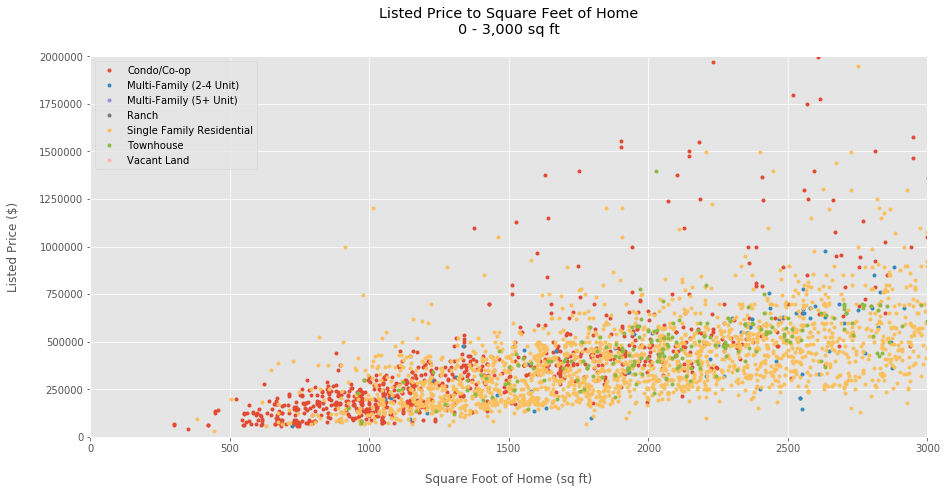

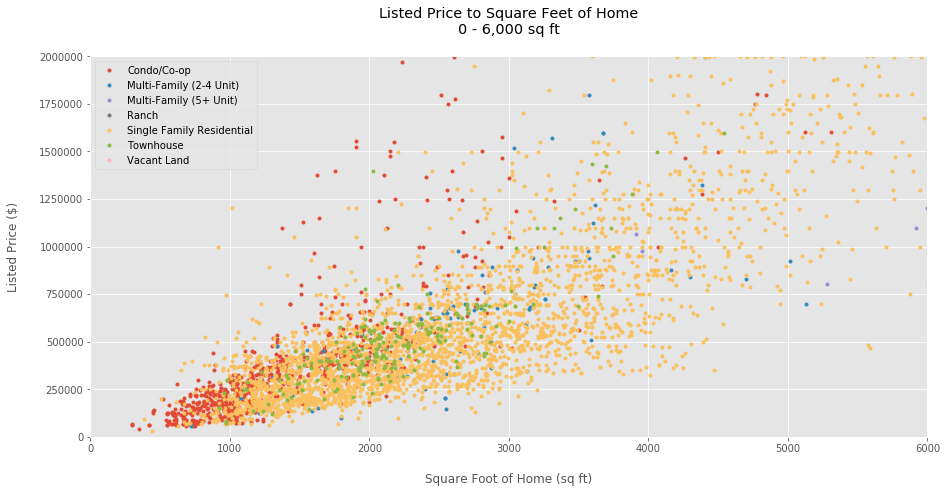

In [10]:
# both graphs on report page 10
# Price to Square Feet up to 3,000 SF
fig, ax = plt.subplots(figsize=(15,7))
groups = d.groupby('property_type')
for name, group in groups:
    ax.plot(group.square_feet, group.price,  marker='o', linestyle='', ms=3, label=name)
ax.legend(numpoints=1)

plt.scatter(d.square_feet, d.price, marker='o', s=3)
plt.title('Listed Price to Square Feet of Home\n0 - 3,000 sq ft\n')
plt.xlabel('\nSquare Foot of Home (sq ft)')
plt.ylabel('Listed Price ($)\n')
plt.xlim(0, 3000)
plt.ylim(0, 2000000)
plt.show()

# Price to Square Feet,  0 - 6,000 SF

fig, ax = plt.subplots(figsize=(15,7))
groups = d.groupby('property_type')
for name, group in groups:
    ax.plot(group.square_feet, group.price,  marker='o', linestyle='', ms=3, label=name)
ax.legend(numpoints=1)

plt.scatter(d.square_feet, d.price, marker='o', s=3)
plt.title('Listed Price to Square Feet of Home\n0 - 6,000 sq ft\n')
plt.xlabel('\nSquare Foot of Home (sq ft)')
plt.ylabel('Listed Price ($)\n')
plt.xlim(0, 6000)
plt.ylim(0, 2000000)
plt.show()

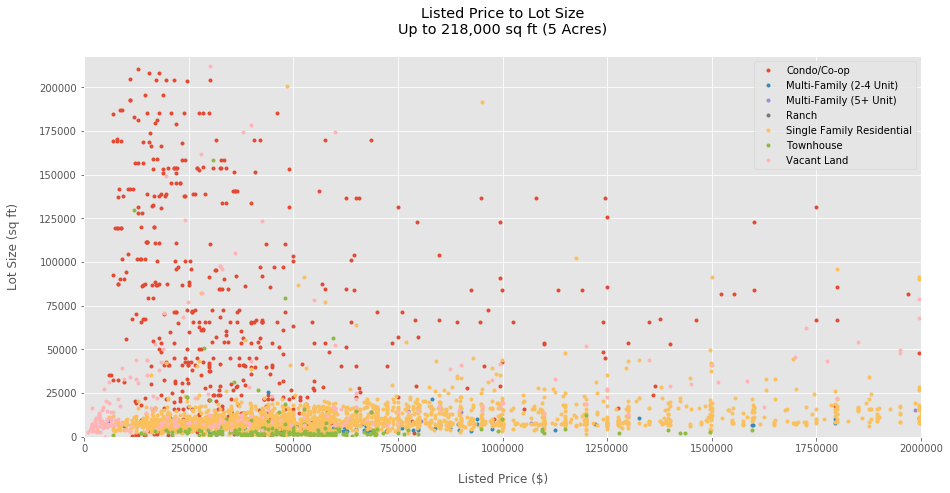

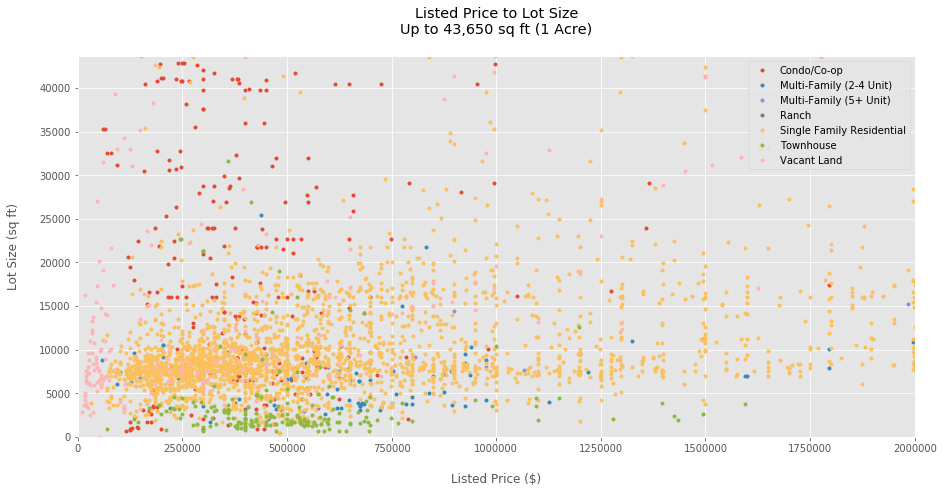

In [11]:
# both graphs on report page 11

# Price to Lot Size up to 5 Acres

fig, ax = plt.subplots(figsize=(15,7))
groups = d.groupby('property_type')
for name, group in groups:
    ax.plot(group.price, group.lot_size, marker='o', linestyle='', ms=3, label=name)
ax.legend(numpoints=1)

plt.scatter(d.price, d.lot_size, marker='o', s=3)
plt.title('Listed Price to Lot Size\nUp to 218,000 sq ft (5 Acres)\n')
plt.xlabel('\nListed Price ($)')
plt.ylabel('Lot Size (sq ft)\n')
plt.xlim(0, 2000000)
plt.ylim(0, 217800)
plt.show()

# Price to Lot Size up to 1 Acre

fig, ax = plt.subplots(figsize=(15,7))
groups = d.groupby('property_type')
for name, group in groups:
    ax.plot(group.price, group.lot_size, marker='o', linestyle='', ms=3, label=name)
ax.legend(numpoints=1)

plt.scatter(d.price, d.lot_size, marker='o', s=3)
plt.title('Listed Price to Lot Size\nUp to 43,650 sq ft (1 Acre)\n')
plt.xlabel('\nListed Price ($)')
plt.ylabel('Lot Size (sq ft)\n')
plt.xlim(0, 2000000)
plt.ylim(0, 43650)
plt.show()

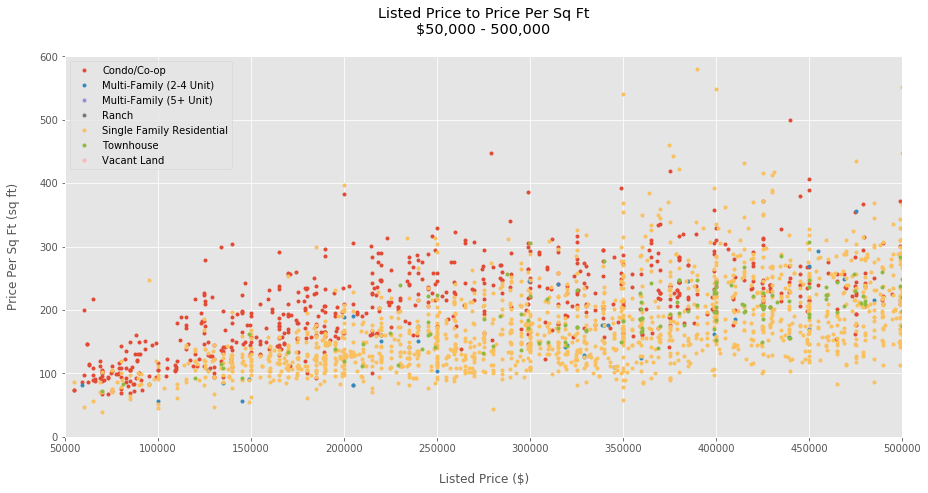

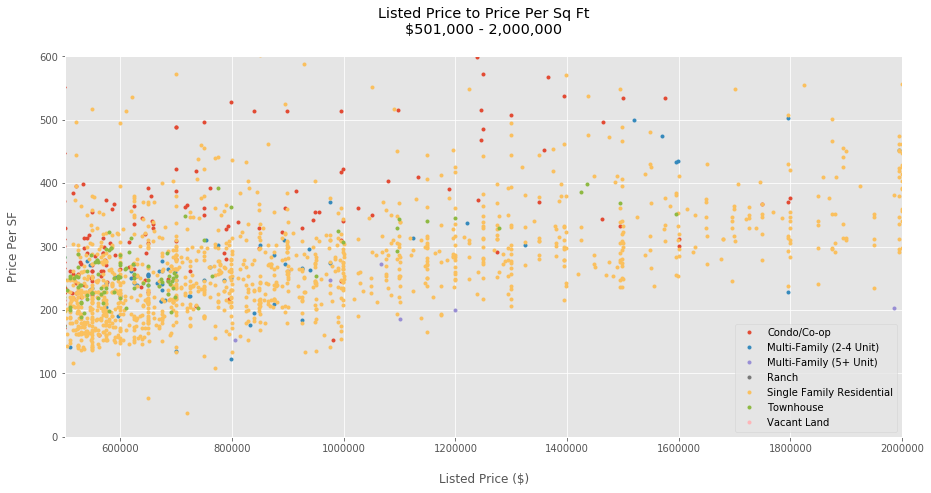

In [12]:
# both graphs on rpeort page 12
#  Listed Price : Price Per SF
#  $50,000 - 500,000

fig, ax = plt.subplots(figsize=(15,7))
groups = d.groupby('property_type')
for name, group in groups:
    ax.plot(group.price, group.price_per_square_feet, marker='o', linestyle='', ms=3, label=name)
ax.legend(numpoints=1)

plt.scatter(d.price, d.price_per_square_feet, marker='o', s=3)
plt.title('Listed Price to Price Per Sq Ft\n$50,000 - 500,000\n')
plt.xlabel('\nListed Price ($)')
plt.ylabel('Price Per Sq Ft (sq ft)\n')
plt.xlim(50000, 500000)
plt.ylim(0, 600)
plt.show()

#  Listed Price : Price Per SF
#  $501,000 - 2,000,000

fig, ax = plt.subplots(figsize=(15,7))
groups = d.groupby('property_type')
for name, group in groups:
    ax.plot(group.price, group.price_per_square_feet, marker='o', linestyle='', ms=3, label=name)
ax.legend(numpoints=1)

plt.scatter(d.price, d.price_per_square_feet, marker='o', s=3)
plt.title('Listed Price to Price Per Sq Ft\n$501,000 - 2,000,000\n')
plt.xlabel('\nListed Price ($)')
plt.ylabel('Price Per SF\n')
plt.xlim(501000, 2000000)
plt.ylim(0, 600)
plt.show()

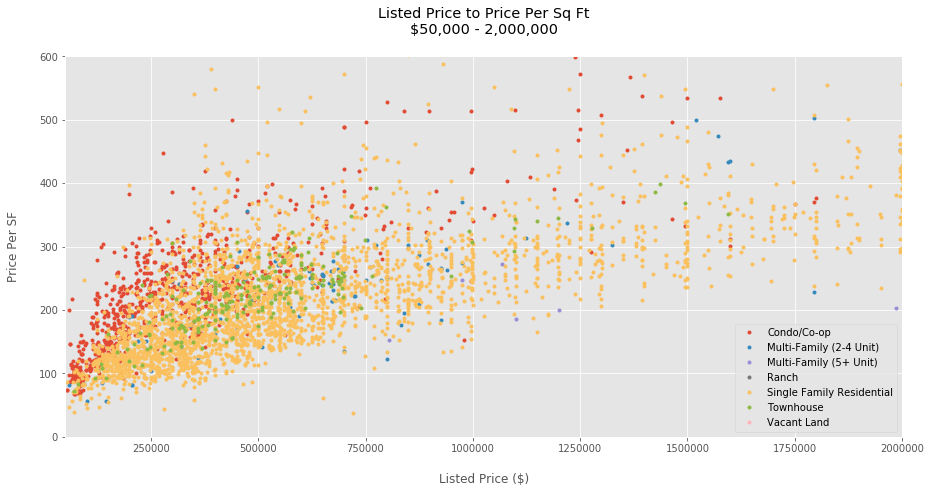

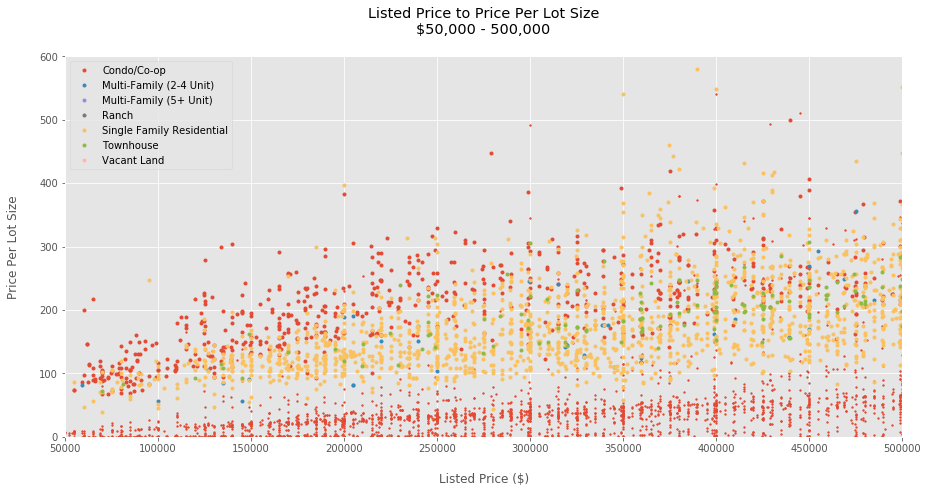

In [13]:
# both graphs on report page 13

#  Listed Price : Price Per SF
#  $50,000 - 2,000,000

fig, ax = plt.subplots(figsize=(15,7))
groups = d.groupby('property_type')
for name, group in groups:
    ax.plot(group.price, group.price_per_square_feet, marker='o', linestyle='', ms=3, label=name)
ax.legend(numpoints=1)

plt.scatter(d.price, d.price_per_square_feet, marker='o', s=3)
plt.title('Listed Price to Price Per Sq Ft\n$50,000 - 2,000,000\n')
plt.xlabel('\nListed Price ($)')
plt.ylabel('Price Per SF\n')
plt.xlim(50000, 2000000)
plt.ylim(0, 600)
plt.show()

# Listed Price : Price per Lot Size
# $50,000 - 500,000

fig, ax = plt.subplots(figsize=(15,7))
groups = d.groupby('property_type')
for name, group in groups:
    ax.plot(group.price, group.price_per_square_feet, marker='o', linestyle='', ms=3, label=name)
ax.legend(numpoints=1)

d = pd.read_csv("dallas_available_real_estate.csv")
d['price_per_lot_size'] = d['price'] / d['lot_size']
plt.scatter(d.price, d.price_per_lot_size, marker='o', s=3)
plt.title('Listed Price to Price Per Lot Size\n$50,000 - 500,000\n')
plt.xlabel('\nListed Price ($)')
plt.ylabel('Price Per Lot Size\n')
plt.xlim(50000, 500000)
plt.ylim(0, 600)
plt.show()

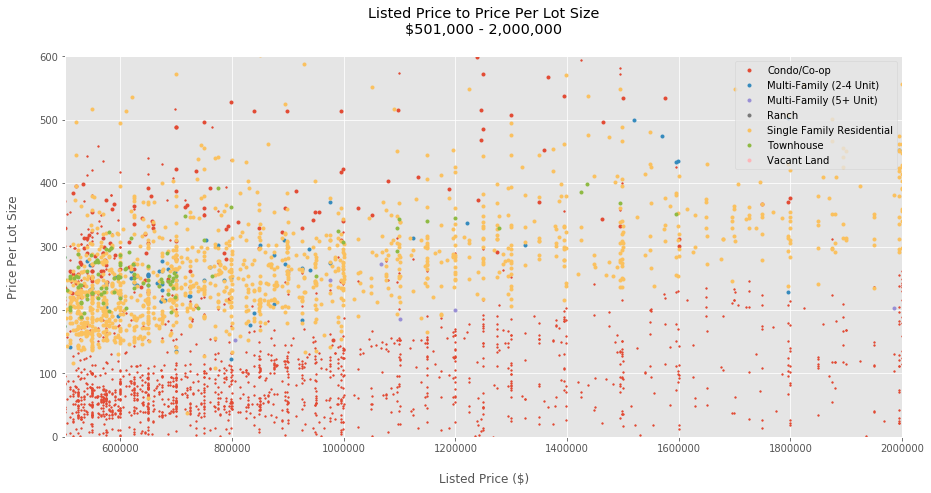

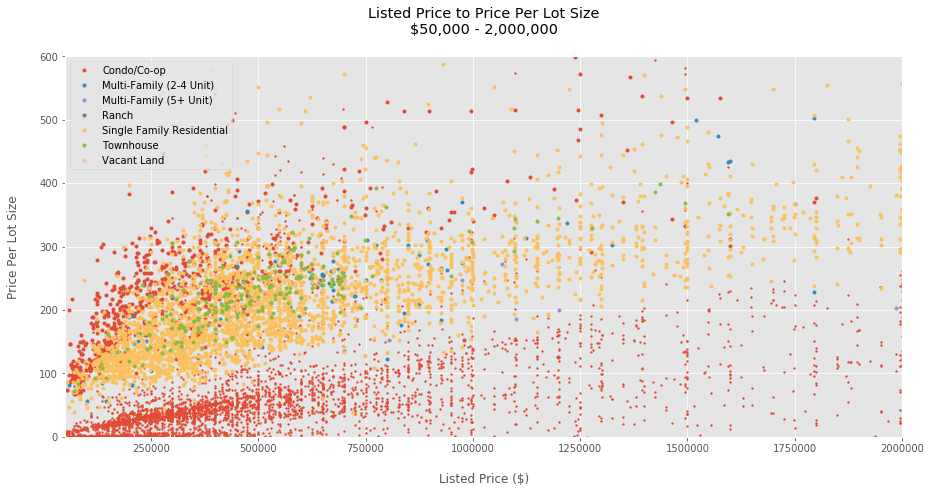

In [14]:
# both graphs on report page 14
# Listed Price : Price per Lot Size
# $501,000 - 2,000,000

fig, ax = plt.subplots(figsize=(15,7))
groups = d.groupby('property_type')
for name, group in groups:
    ax.plot(group.price, group.price_per_square_feet, marker='o', linestyle='', ms=3, label=name)
ax.legend(numpoints=1)

d = pd.read_csv("dallas_available_real_estate.csv")
d['price_per_lot_size'] = d['price'] / d['lot_size']
plt.scatter(d.price, d.price_per_lot_size, marker='o', s=3)
plt.title('Listed Price to Price Per Lot Size\n$501,000 - 2,000,000\n')
plt.xlabel('\nListed Price ($)')
plt.ylabel('Price Per Lot Size\n')
plt.xlim(501000, 2000000)
plt.ylim(0, 600)
plt.show()

# Listed Price : Price per Lot Size
# $50,000 - 2,000,000

fig, ax = plt.subplots(figsize=(15,7))
groups = d.groupby('property_type')
for name, group in groups:
    ax.plot(group.price, group.price_per_square_feet, marker='o', linestyle='', ms=3, label=name)
ax.legend(numpoints=1)

d = pd.read_csv("dallas_available_real_estate.csv")
d['price_per_lot_size'] = d['price'] / d['lot_size']
plt.scatter(d.price, d.price_per_lot_size, marker='o', s=3)
plt.title('Listed Price to Price Per Lot Size\n$50,000 - 2,000,000\n')
plt.xlabel('\nListed Price ($)')
plt.ylabel('Price Per Lot Size\n')
plt.xlim(50000, 2000000)
plt.ylim(0, 600)
plt.show()

Text(0, 0.5, 'Asking price per square foot')

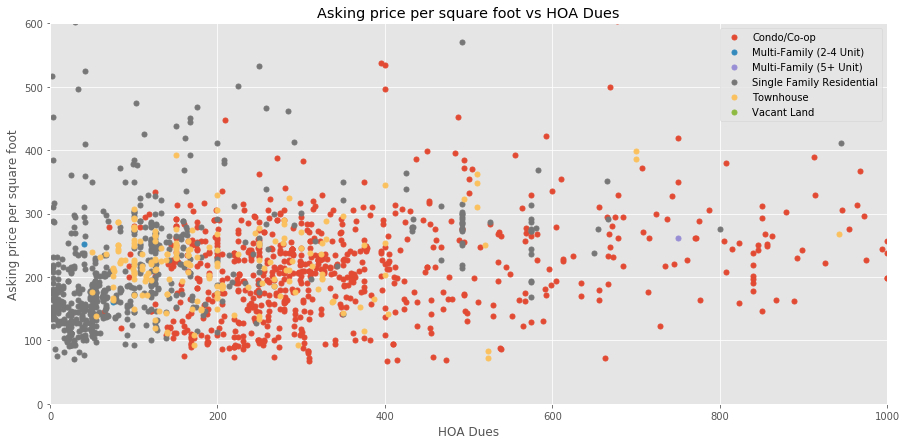

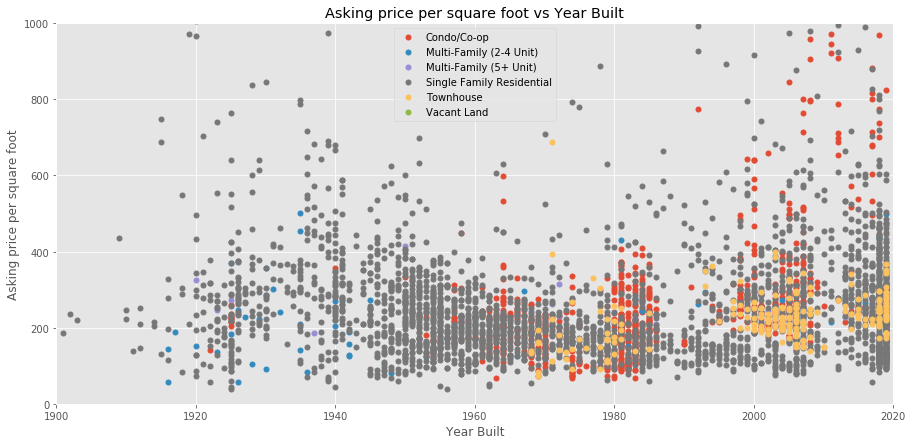

In [15]:
# both graphs on report page 15
# asking price per square foot vs hoa
fig, ax = plt.subplots(figsize=(15,7))
groups = d_active[~d_active.property_type.str.contains("Ranch")].groupby('property_type')
for name, group in groups:
    ax.plot(group.hoa_per_month, group.price_per_square_feet, marker='o', linestyle='', ms=5, label=name)
ax.set_xlim(0, 1000)
ax.set_ylim(0, 600)
ax.legend(numpoints=1)
plt.title('Asking price per square foot vs HOA Dues')
plt.xlabel('HOA Dues')
plt.ylabel('Asking price per square foot')

# asking price per square foot vs year built
fig, ax = plt.subplots(figsize=(15,7))
groups = d_active[~d_active.property_type.str.contains("Ranch")].groupby('property_type')
for name, group in groups:
    ax.plot(group.year_built, group.price_per_square_feet, marker='o', linestyle='', ms=5, label=name)
ax.set_xlim(1900, 2020)
ax.set_ylim(0, 1000)
ax.legend(numpoints=1)
plt.title('Asking price per square foot vs Year Built')
plt.xlabel('Year Built')
plt.ylabel('Asking price per square foot')

Text(0.5, 0, 'Price ($)')

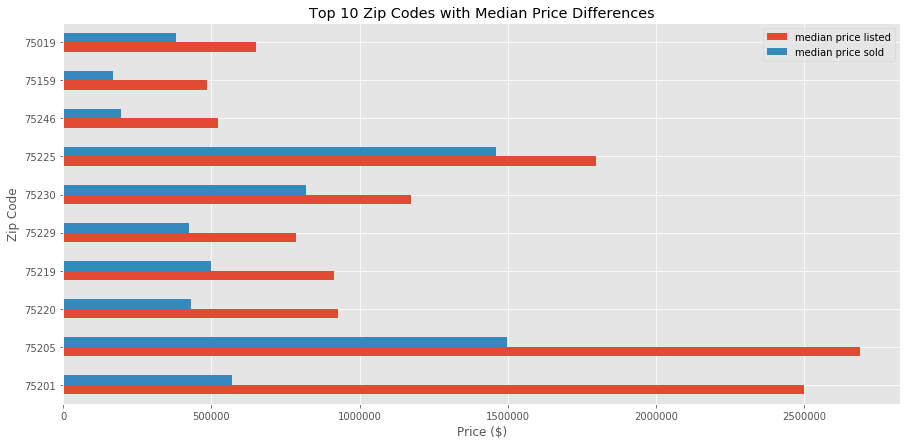

In [16]:
# groups available/sold homes by zip code then property type
a_zip_type = avail.groupby(['zip_or_postal_code', 'property_type'])
s_zip_type = sold.groupby(['zip_or_postal_code', 'property_type'])

# sorts values by largest to smallest
a1 = a_zip_type['price'].median().sort_values(ascending=False)
s1 = s_zip_type['price'].median().sort_values(ascending=False)

# makes pandas series into dataframe
a1 = a1.to_frame(name='median price listed')
s1 = s1.to_frame(name='median price sold')

# combines the available and sold data into one dataframe
test = pd.concat([a1, s1], axis=1)

# makes a column for difference between listed price and sold price
test['average difference'] = test['median price listed'] - test['median price sold']

# replaces all values with "nan" to 0
test.replace(np.nan, 0, inplace=True)

# sorts values
test.sort_values('average difference', ascending=False)

# Same as above but just for single family residential homes 

a_sfr = avail.groupby('property_type').get_group('Single Family Residential')
s_sfr = sold.groupby('property_type').get_group('Single Family Residential')
a2 = a_sfr.groupby('zip_or_postal_code')['price'].median()
s2 = s_sfr.groupby('zip_or_postal_code')['price'].median()

a2 = a2.to_frame(name='median price listed')
s2 = s2.to_frame(name='median price sold')
test2 = pd.concat([a2, s2], axis=1)
test2['average difference'] = test2['median price listed'] - test2['median price sold']
test2.replace(np.nan, 0, inplace=True)
test2.sort_values('average difference', ascending=False)

# report page 16
fig, ax = plt.subplots(figsize=(15,7))
test2_sorted = test2.nlargest(10,'average difference')
test2_sorted.plot(y=['median price listed', 'median price sold'], kind='barh', ax=ax)
plt.title("Top 10 Zip Codes with Median Price Differences")
plt.ylabel("Zip Code")
plt.xlabel("Price ($)")